## Get Node Data
Data source: 'https://drexel0-my.sharepoint.com/:f:/r/personal/sr3563_drexel_edu/Documents/Social_NLP_Lab/Datasets/Reddit%20Drug%20Data-%20RAW%20-%20DNT/Central/data%20Dec%201st%202022?csf=1&web=1&e=Wa9obk" 

`Datasets > Central > data Dec 1st 2022`

Data Selection:  
1. Top Drug subreddit in each class  
  a. Depressants: r/benzodiazipines 
  b. Hallucinogens: r/lsd
  c. Narcotics (Opioids): r/opiates
  d. Stimulants: r/cocaine
  e. Cannabis: r/trees
2. Get all users who have made at least 2 posts in the subreddit during the year june 2021-june 2022


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
# do not print warnings
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

---

WITH dATA FROM ONEDRIVE

Missing author username - just author id which cannot be passed to submission API

In [34]:
# get posts from the june 2021-june 2022

# path = "/Users/laylabouzoubaa/Library/CloudStorage/OneDrive-DrexelUniversity/Social_NLP_Lab/Datasets/Reddit Drug Data- RAW - DNT/Central/data Dec 1st 2022/data 2018_1_1 to 2022_7_30_"
# subs = ["LSD", "benzodiazepines", "cocaine", "opiates"]
# bot_patterns = ["-bot", "AutoModerator", "Bot", "BOT", "B0T", "b0t", "b0T", "bOt", "_bot"]


# def make_drug_df(sub):
#     df = pd.read_json(path + sub + "_submission.json", lines=True)
#     df = pd.DataFrame(df[1][0])
#     users = pd.read_json(path + sub + "_redditor.json", lines=True)
#     users = pd.DataFrame(users[1][0])
#     # join name by id
#     df = df.merge(users[["id", "name", "post_karma"]], left_on="author", right_on="id")
#     # convert created at to datetime
#     df["created_utc"] = pd.to_datetime(df["created_utc"],  unit='s')
#     # filter by date >= july 1 2021
#     df = df[df["created_utc"] >= "2021-07-01"]

#     # filter out bots
#     df = df[~df["name"].str.contains('|'.join(bot_patterns))]

#     # filter users that have negative post karma
#     df = df[df["post_karma"] >= 0]

#     return df

In [35]:
# opiates = make_drug_df("opiates")
# LSD = make_drug_df("LSD")
# cocaine = make_drug_df("cocaine")
# benzodiazepines = make_drug_df("benzodiazepines")

Potential bot detection:

In [36]:
# remove posts that were removed
# opiates= opiates[opiates["text"] != "[removed]"]
# LSD= LSD[LSD["text"] != "[removed]"]
# cocaine= cocaine[cocaine["text"] != "[removed]"]
# benzodiazepines= benzodiazepines[benzodiazepines["text"] != "[removed]"]

<AxesSubplot:>

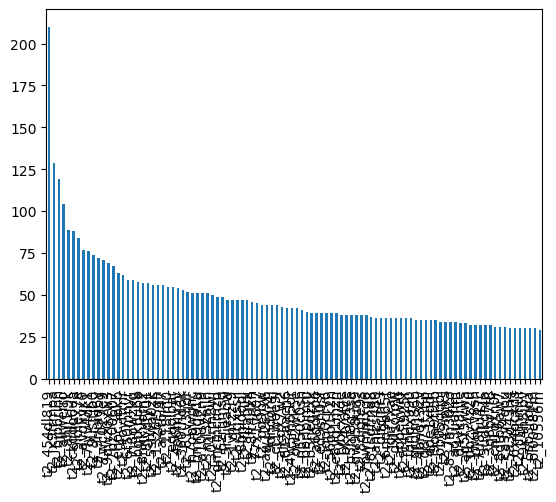

In [12]:
# look at frequency of posts per user
# cocaine["author"].value_counts().sort_values(ascending=False).head(100).plot(kind="bar")

In [37]:
# mean posts
# opiates["author"].value_counts().mean()

1.0

In [38]:
# filter out users with less than 10 posts
# opiates2 = opiates.groupby("author").filter(lambda x: len(x) >= 10)
# LSD2 = LSD.groupby("author").filter(lambda x: len(x) >= 10)
# cocaine2 = cocaine.groupby("author").filter(lambda x: len(x) >= 10)
# benzodiazepines2 = benzodiazepines.groupby("author").filter(lambda x: len(x) >= 10)

In [43]:
# print("mean number of posts per user opiates: ", opiates2["author"].value_counts().mean())
# print("mean number of posts per user cocaine: ", cocaine2["author"].value_counts().mean())
# print("mean number of posts per user benzo: ", benzodiazepines2["author"].value_counts().mean())
# print("mean number of posts per user LSD: ", LSD2["author"].value_counts().mean())

mean number of posts per user opiates:  16.44776119402985
mean number of posts per user cocaine:  20.838658146964857
mean number of posts per user benzo:  15.324675324675324
mean number of posts per user LSD:  17.5761316872428


In [44]:
# print("max number of posts per user opiates: ", opiates2["author"].value_counts().max())
# print("max number of posts per user cocaine: ", cocaine2["author"].value_counts().max())
# print("max number of posts per user benzo: ", benzodiazepines2["author"].value_counts().max())
# print("max number of posts per user LSD: ", LSD2["author"].value_counts().max())

max number of posts per user opiates:  54
max number of posts per user cocaine:  210
max number of posts per user benzo:  86
max number of posts per user LSD:  130


In [15]:
# get list of unique user ids
# opiates_users = opiates2["name"].unique()
# LSD_users = LSD2["name"].unique()
# cocaine_users = cocaine2["name"].unique()
# benzodiazepines_users = benzodiazepines2["name"].unique()

In [23]:
# total number of users
# len(opiates_users) + len(LSD_users) + len(cocaine_users) + len(benzodiazepines_users)

1090

In [26]:
# save as json
# write each user list to json
# with open('data/opiates_users.json', 'w') as f:
#     json.dump(opiates_users.tolist(), f)
# with open('data/LSD_users.json', 'w') as f:
#     json.dump(LSD_users.tolist(), f)
# with open('data/cocaine_users.json', 'w') as f:
#     json.dump(cocaine_users.tolist(), f)
# with open('data/benzodiazepines_users.json', 'w') as f:
#     json.dump(benzodiazepines_users.tolist(), f)

Get user data based on id

In [17]:
# run all_users to py/get_user_subreddit.py
# IN THE TERMINAL

In [2]:
# get the count of each subreddit within the subreddit column
def get_sub_count(df):
    # users with empty subreddit did not post in any subreddit
    df = df[df["subreddit"].map(len) > 0]
    df["engaged_subs"] = ""
    for row in df.iterrows():
        counter = 0
        engaged_subs = []
        for sub in row[1]["subreddit"]:
            # count each distinct subreddit
            counter += 1
            if counter >= 10:
                engaged_subs.append(sub)
        df.at[row[0], "engaged_subs"] = list(set(engaged_subs))
    return df

In [3]:
# read in users per subreddit
path = './data/user_subs/2023-04-20'
subs = ["LSD", "benzodiazepines", "cocaine", "opiates"]
for sub in subs:
    df = pd.read_json(path + "/user_subreddits_0_" + sub + ".json", lines=True)
    df = df.T.reset_index().rename(columns={"index": "name", 0: "subreddit"})
    df = get_sub_count(df)
    df = df[["name", "engaged_subs"]]
    # store as df in env
    exec(sub + "_clean = df")

In [4]:
cocaine_clean = cocaine_clean.explode("engaged_subs").reset_index(drop=True)
LSD_clean = LSD_clean.explode("engaged_subs").reset_index(drop=True)
benzodiazepines_clean = benzodiazepines_clean.explode("engaged_subs"). reset_index(drop=True)
opiates_clean = opiates_clean.explode("engaged_subs").reset_index(drop=True)

---

MAKE NETWORKS

In [19]:
# convert to func
def make_edge_df(df):
    # left outer join on itself
    df2 = pd.merge(df, df, left_on= "name", right_on = "name", how = "left")
    df2 = df2.groupby(["engaged_subs_x", "engaged_subs_y"]).size().reset_index(name="weight")
    df2 = df2[df2["engaged_subs_x"] != df2["engaged_subs_y"]]
    df2 = df2.sort_values(by = "weight", ascending = False)
    return df2

In [21]:
cocaine2 = make_edge_df(cocaine_clean)
LSD2 = make_edge_df(LSD_clean)
benzodiazepines2 = make_edge_df(benzodiazepines_clean)
opiates2 = make_edge_df(opiates_clean)

In [29]:
# subset by index 
cocaine2 = cocaine2[::2]
LSD2 = LSD2[::2]
benzodiazepines2 = benzodiazepines2[::2]
opiates2 = opiates2[::2]

In [31]:
# rename cols
cocaine2 = cocaine2.rename(columns = {"engaged_subs_x": "source", "engaged_subs_y": "target"})
LSD2 = LSD2.rename(columns = {"engaged_subs_x": "source", "engaged_subs_y": "target"})
benzodiazepines2 = benzodiazepines2.rename(columns = {"engaged_subs_x": "source", "engaged_subs_y": "target"})
opiates2 = opiates2.rename(columns = {"engaged_subs_x": "source", "engaged_subs_y": "target"})

In [32]:
# export to csv

cocaine2.to_csv("data/cocaine_clean.csv", index=False)
LSD2.to_csv("data/LSD_clean.csv", index=False)
benzodiazepines2.to_csv("data/benzodiazepines_clean.csv", index=False)
opiates2.to_csv("data/opiates_clean.csv", index=False)

---

NETWORK ANALYSIS

In [ ]:
import networkx

---

OLD

In [ ]:
from pmaw import PushshiftAPI

start_epoch=int(dt.datetime(2022, 1, 1).timestamp())
end_epoch=int(dt.datetime(2022, 12, 31).timestamp())

In [ ]:
# Initialize PushShift
api = PushshiftAPI(file_checkpoint = 10)
posts = api.search_submissions(after=start_epoch,
                            # before=end_epoch,
                            subreddit='trees',
                            limit=10, memsafe=True)
print(f'{len(posts)} posts retrieved from Pushshift')

Not all PushShift shards are active. Query results may be incomplete.


0 posts retrieved from Pushshift


In [ ]:
# get all responses
post_list = [post for post in posts]